# D1 and D2 neurons in the Direct and Indirect Pathways of the Nucleus Accumbens

## Group Yetifans

## Abstract

The focus of this study was to analyze the relationship between gene expression of DRD1 and DRD2 in key regions implicated in MDD, namely the NAc, VP, and VTA, and projection density of DRD1-expressing neurons and DRD2-expressing neurons in the corresponding regions. Utilizing data from the Allen Brain MicroArray and Mouse Brain Connectivity databases, significant differences in DRD1 gene expression among the three regions, DRD2 gene expression among the three regions, and between DRD1 and DRD2 gene expression for all three regions were found. While regression analysis was conducted, the statistical power to determine significance of the correlation between gene expression and projection density was limited by the small sample size. However, findings suggest receptor gene expression may inform connectivity within this circuitry, providing potential insights into MDD and treatment response mechanisms.  

## Research Question

How does the connectivity of Dopamenergic D1 and D2 neurons differ in the nucleas accumbens, ventral tegmental area, and ventral pallidum and can the gene expression of these two cell types help to predict any potenital differences?

# Background and Prior Work

Major depressive disorder (MDD) impacts roughly 10% of adults in the US. Despite such prevalence, its treatment has variable effectiveness (Andrade et al., 2003; Berton and Nestler, 2006). Unfortunately, it remains unclear whether molecular and genetic factors play a role in the variable treatment responses observed in MDD. The most common symptoms of MDD can be characterized as decreases in appetite and motivation which involve the reward circuitry (Nestler and Hyman, 2010). Precisely, the mesolimbic circuitry and its dopaminergic receptors are central to reward. This pathway involves the nucleus accumbens (NAc) and the ventral tegmental area (VTA), where the NAc is necessary for reward-seeking and negative emotion processing. The VTA is critical for hedonics, reward-related learning, and behavioral adaptations, and is reciprocally connected (Zhou, 2022; Doncheck and Mantsch, 2019). VTA dopaminergic neurons project to the NAc where inhibitory D1-receptor expressing and D2-receptor expressing medium spiny neurons (D1-MSNs and D2-MSNs) are the dominant cell population in the NAc and have been known to play a role in stress-induced depressive behaviors (Knowland and Lim, 2018). D1-MSNs and D2-MSNs have different anatomical connections where D1-MSNs are located in the NAc to the VTA, and the ventral pallidum (VP) is known to receive dense inputs from D1-MSNs and D2-MSNs in the NAc that project this information to the VTA and other downstream targets. The VP is part of the limbic loop of the basal ganglia, a pathway involved in regulating motivation and emotion. Direct activation of D1-MSNs has been shown to induce reinforcements and excitatory effects while direct activation of D2-MSNs has been shown to induce punishment and inhibitory effects (Kravitz et al., 2012). We are interested in analyzing the direct D1 pathway from the NAc to the VTA (mesolimbic pathway) alongside an indirect pathway which is from the NAc with D2-MSNs as input neurons to the VP and then to the VTA. 

Due to our interest in the mesolimbic circuitry, we chose to compare the gene expression levels of D1 receptors and D2 receptors in the NAc, VP, and VTA to the projection volumes of D1 receptor-expressing neurons and D2 receptor-expressing neurons from the NAc to the VP and VTA. We utilized the Allen Brain MicroArray database to obtain the expression levels of D1 receptors and D2 receptors. The microarray database carries gene expression levels in different brain areas from multiple adult control brains. There are 62,000 gene probes per profile, about 500 samples per hemisphere, and the data is mapped with histology into a 3-dimensional anatomical framework created from MRI(Allen Brain Institute, 2011). The dataset in our analysis is filtered to include only the cell types of interest and brain areas of interest. 

We also incorporated the Allen Mouse Brain Connectivity database that maps the neural connections in the mouse brain using a Cre/Lox system for specificity. A viral tracer labels the axonal projections and the neurons expressing the viral tracers are labeled with fluorescence that are quantified from 2-photon imaging(Allen Brain Institute, 2011). Again, this database was filtered to include the D1-Cre lines and D2-Cre lines where dopaminergic NAc neuronal projections to the VTA, VP, and NAc were analyzed. 



### Background References:

Allen Institute for Brain Science (2004). Allen Mouse Brain Atlas Connectivity. Available from mouse.brain-map.org.Allen Institute for Brain Science (2011).

Allen Institute for Brain Science (2004). Allen Mouse Brain Atlas MicroArray. Available from mouse.brain-map.org.Allen Institute for Brain Science (2011).

Andrade, L., Caraveo-Anduaga, J. J., Berglund, P., Bijl, R. V., De Graaf, R., Vollebergh, W., Dragomirecka, E., Kohn, R., Keller, M., Kessler, R. C., Kawakami, N., Kiliç, C., Offord, D., Ustun, T. B., & Wittchen, H. U. (2003). The epidemiology of major depressive episodes: results from the International Consortium of Psychiatric Epidemiology (ICPE) Surveys. International journal of methods in psychiatric research, 12(1), 3–21. https://doi.org/10.1002/mpr.138

Doncheck, E. M., & Mantsch, J. R. (2019). Role of Stress-Associated Signaling in Addiction. https://doi.org/10.1016/B978-0-12-812202-0.00011-7

Knowland, D., & Lim, B. K. (2018). Circuit-based frameworks of depressive behaviors: The role of reward circuitry and beyond. Pharmacology, biochemistry, and behavior, 174, 42–52. https://doi.org/10.1016/j.pbb.2017.12.010

Nestler, E. J., & Hyman, S. E. (2010). Animal models of neuropsychiatric disorders. Nature neuroscience, 13(10), 1161–1169. https://doi.org/10.1038/nn.2647

Zhou, K., Xu, H., Lu, S. et al. (2022). Reward and aversion processing by input-defined parallel nucleus accumbens circuits in mice. Nat Commun 13, 6244.  https://doi.org/10.1038/s41467-022-33843-3


## Hypothesis


In our circuit of interest, we predict a higher level of D2 receptors and D2 projection density to be present in the ventral pallidum. We predict that the nucleus accumbens should have high levels of both receptor types and innervation from both neuron types. The ventral tegmental Area should receive inputs from both neuron types as well as expressing high levels of DRD1a and DRD2. Finally, we predict that there will be a positive correlation between a brain area's gene expression for a certain receptor and its projection density from that same cell type. 

## Setup

First, we need to install the data that we will be using from the allen institute as well as all the toolkits needed for the wrangling, analysis, and visualizations

In [1]:
#!pip install allensdk

#Importing necessary toolkits - uncomment if needed while running code

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from functools import reduce
import statistics
import requests
import json
import csv
import statsmodels.api as sm

# Data Wrangling

## Microarray Data

The microarray dataset provides information about the gene expression of D1 and D2 receptors in particular brain areas from donors where the mRNA levels are quantified and normalized. We are interested in comparing these expression levels in the nucleus accumbens, the ventral pallidum, and the ventral tegmental area. This section organizes the dataframe and determines the mean value of expression for each brain area. Note that the allen institute organizes their data by nucleus, thus the ventral pallidum is referenced in our dataset as the substantia innominata (for our purposes these will be treated synonymously as data for the other nucleus, the magnocellular nucleus, was not available in most of the experimental data).


First, we want to organize the data so that we have separate dataframes for D1 and D2 receptor expression and can index the expression level by the brain area and receptor type that we are interested in. We used .csv files to separate the D1 and D2 data as this data was not able to be loaded in from the internet. Then, we will extract the data that we are interested in based on the brain area for further comparison.

In [2]:
#Accessing D1 and D2 expression levels in different brain areas.
#expression dataframe is the normalized gene expression for each probe
#columns dataframe gives information about each gene expression column, including brain area
#probes dataframe gives information about each probe used in each row of the expression dataframe
drd1A_expression_df1 = pd.read_csv("Expression.csv", header =None)
drd1A_columns_df = pd.read_csv("Columns.csv")
drd1A_probes_df1 = pd.read_csv("Probes.csv")

drd2_expression_df = pd.read_csv("Expression_drd2.csv", header=None)
drd2_columns_df = pd.read_csv("Columns_drd2.csv")
drd2_probes_df = pd.read_csv("Probes_drd2.csv")

In [3]:
#remove all the genes that are not DRD1 from the probes and expression dfs and writes a new df for each
drd1A_probes_df = drd1A_probes_df1.iloc[2:22]
drd1A_expression_df = drd1A_expression_df1.iloc[1:22]

#show the probe information
drd1A_probes_df.head()

#show the expression values
drd1A_expression_df[0:5]

,0,1,2,3,4,5,6,7,8,9,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
1,1043986,-0.0371,-0.0820,-0.0228,0.1142,0.1938,0.2972,0.1132,0.3444,0.2088,...,-0.3791,NaN,0.7177,-0.1855,0.5009,0.1508,0.0863,-3.4104,NaN,-3.0842
2,1022740,0.8934,0.6389,0.7086,0.9939,0.6699,0.7273,0.7026,0.9075,0.8246,...,-0.3913,NaN,-0.5574,-0.4860,-0.3706,0.0299,-0.5195,-1.0960,NaN,-1.4345
3,1022768,0.7223,-0.2077,0.5518,0.1611,-0.0208,-0.1829,-0.2593,0.5764,0.2545,...,1.1656,NaN,2.1174,1.4998,-0.0031,0.7024,1.0613,-0.0656,NaN,-0.5478
4,1022767,0.6638,-0.3725,0.5363,0.9453,0.1446,-0.2062,-0.2023,0.0249,0.2449,...,-0.2003,NaN,0.2402,0.0642,-0.3742,0.7346,-0.2488,-0.7443,NaN,-0.9192
5,1022757,0.9892,0.5909,1.1438,1.0197,0.5686,0.6044,0.4226,1.1734,0.9536,...,-0.1254,NaN,0.2016,-0.1305,-0.8457,-0.5546,-0.7522,-1.0635,NaN,-1.3242


In [4]:
#from each probe, the average expression is determined(each column)
drd1A_expression_means = list(drd1A_expression_df.mean())

#overwrite to exclude the id number
drd1A_expression_means = drd1A_expression_means[1:]

#show drd1 mean expressions
drd1A_expression_means[0:5]

[0.5066476190476191,
 0.4633761904761905,
 0.5676857142857143,
 0.640547619047619,
 0.40952857142857146]

In [5]:
#create a list of the structure names to correspond with the expression values
drd1A_structure_names = list(drd1A_columns_df['structure_name'])

#show the structure names corresponding to expression values
drd1A_structure_names[0:5]

['anterior orbital gyrus',
 'frontal operculum',
 'frontal pole',
 'gyrus rectus',
 'inferior frontal gyrus, opercular part']

Now we've created a list of the mean expression levels for all the brain area and a list of the structures in the columns.csv. The 'structures' order aligns with the expression level so now we can filter for the nucleus accumbens, ventral pallidum, and ventral tregmental area and create seperate lists of the mean expression levels for these brain areas.

In [6]:
#creating a list of the index values where the Nac is in structure_name and then using this index to find the expression levels of drd1 in the nac
nac = 'nucleus accumbens'
indices = []
drd1A_nac_means = []
for index, na in enumerate(drd1A_structure_names):
    if na == nac:
        indices.append(index)
print(f'Indexes of drd1A expression values for the nucleus accumbens:', indices)
for nac_index in indices:
    drd1A_nac_means.append(drd1A_expression_means[nac_index])#list of gene expression of drd1 in the nac
print(f'drd1A expression level for the nucleus accumbens:',  drd1A_nac_means)


Indexes of drd1A expression values for the nucleus accumbens: [66, 235, 404, 573, 742, 911]
drd1A expression level for the nucleus accumbens: [2.8607476190476193, 2.85792380952381, 2.454942857142857, 2.872742857142857, 2.5179142857142858, 2.290985714285714]


In [7]:
#repeat for VP
#note that the allen institute calls these regions "substantia innominata" and "magnocellular nucleus"
#we combined these because these are the two nuclei of the VP. The magnocellular nucleus does not have as much data as it is a small region, so later in our code we may use only data from the SI depending on what is available.
vp = 'substantia innominata'
indices_vp = []
drd1A_vp_means = []

for ind, v in enumerate(drd1A_structure_names):
    if v == vp:
        indices_vp.append(ind)
print(f'Indexes of drd1A expression values for the Ventral Pallidum:', indices_vp)
for vp_index in indices_vp:
    drd1A_vp_means.append(drd1A_expression_means[vp_index])
print(f'drd1A expression level for the Ventral Pallidum:',  drd1A_vp_means)


Indexes of drd1A expression values for the Ventral Pallidum: [60, 229, 398, 567, 736, 905]
drd1A expression level for the Ventral Pallidum: [1.3483619047619047, 2.4051095238095237, 1.1445523809523808, 1.3960428571428574, 1.9560714285714282, 1.2077238095238096]


In [8]:
#repeat for VTA
vta = 'ventral tegmental area'
indices_vta = []
drd1A_vta_means = []
for indexvta, vt in enumerate(drd1A_structure_names):
    if vt == vta:
        indices_vta.append(indexvta)
print(f'Indexes of drd1A expression values for the Ventral Tegmental Area:', indices_vta)
for indexvta in indices_vta:
    drd1A_vta_means.append(drd1A_expression_means[indexvta])
print(f'drd1A expression level for the Ventral Tegmental Area:',  drd1A_vta_means)


Indexes of drd1A expression values for the Ventral Tegmental Area: [111, 280, 449, 618, 787, 956]
drd1A expression level for the Ventral Tegmental Area: [-0.34863809523809525, -0.29165714285714284, -0.33561428571428575, -0.6328, -0.4356904761904761, -0.39575714285714286]


Now we have the mean D1 expression data for each of our regions of interest. Let's repeat this for D2 receptors.

In [9]:
drd2_expression_means = list(drd2_expression_df.mean())
drd2_structure_names = list(drd2_columns_df['structure_name'])

#find instances of NAC in structure name and add the expression value from that index to a new list
nac_drd2 = 'nucleus accumbens'
indices_nac2 = []
drd2_nac_means = []
for i, nacdrd2 in enumerate(drd2_structure_names):
    if nacdrd2 == nac_drd2:
        indices_nac2.append(i)

for item in indices_nac2:
    drd2_nac_means.append(drd2_expression_means[item])

print(f'DRD2 expression level for the nucleus accumbens:',  drd2_nac_means)

DRD2 expression level for the nucleus accumbens: [2.68504, 2.176, 2.4898000000000002, 2.05736, 1.8538000000000001, 1.85592]


In [10]:
#repeat for VP
vpdrd2 = 'substantia innominata'

indices_vp2 = []
drd2_vp_means = []

for ind2, v2 in enumerate(drd2_structure_names):
    if v2 == vpdrd2:
        indices_vp2.append(ind2)
        
print(f'Indexes of DRD2 expression values for the Ventral Pallidum:', indices_vp2)

for vp2_index in indices_vp2:
    drd2_vp_means.append(drd2_expression_means[vp2_index])

del drd2_vp_means[4]#has the value nan
print(f'DRD2 expression level for the Ventral Pallidum:',  drd2_vp_means)


Indexes of DRD2 expression values for the Ventral Pallidum: [60, 229, 398, 567, 736, 905]
DRD2 expression level for the Ventral Pallidum: [0.21675999999999998, 0.5036799999999999, 0.31476000000000004, 0.21683999999999998, 0.5344599999999999]


In [11]:
#repeat for VTA
vta = 'ventral tegmental area'
indices_vta2 = []
drd2_vta_means = []

for indexvta2, vt2 in enumerate(drd2_structure_names):
    if vt2 == vta:
        indices_vta2.append(indexvta2)

print(f'Indexes of DRD2 expression values for the Ventral Tegmental Area:', indices_vta2)

for indexvta2 in indices_vta2:
    drd2_vta_means.append(drd2_expression_means[indexvta2])

drd2_vta_means = drd2_vta_means[:2]
print(f'DRD2 expression level for the Ventral Tegmental Area:',  drd2_vta_means)


Indexes of DRD2 expression values for the Ventral Tegmental Area: [111, 280, 449, 618, 787, 956]
DRD2 expression level for the Ventral Tegmental Area: [-0.07346, 0.15977999999999998]


## Connectivity

The connectivity dataset provides information about the projections of neurons and can be indexed by a target region of interest. Because the Nucleus Accumbens is the input structure that we are primarily interested in, we will be filtering for D1 and D2 receptor-expressing neurons that project from the nucleus accumbens. By using a cre-driver line that is selective for DRD1A and DRD2 we can select for experiments in which only neurons that express these genes are present. This section organizes the data and gives us the projection densities for D1/D2 neurons in each target brain area. 


First, we need to import all of the connectivity data and packages that we need and make a new dataframe containing all of the experiments. We will use this to access the cre experiments that we want.

In [12]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
from allensdk.api.queries.mouse_connectivity_api import MouseConnectivityApi

#Import Onto package
from allensdk.api.queries.ontologies_api import OntologiesApi
oapi = OntologiesApi()

mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')

#Gather all the experiments with Cre and WildType
all_experiments = mcc.get_experiments(dataframe=True)

#Grab the StructureTree instance. This will give us all of the brain regions that are connected and can be accessed through our new df.
structure_tree = mcc.get_structure_tree()

#Get the IDs of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()

#Query the API for information on those structure sets
main_structure_df = pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

In [13]:
# Retrieve list of all structures from summary set
summary_structures = structure_tree.get_structures_by_set_id([167587189])

# Convert list of structures into DataFrame
summary_structures_df = pd.DataFrame(summary_structures)

# List of columns in summary set
list(summary_structures_df.columns)

# Gather all the unique structure names
structure_name = summary_structures_df['name'].unique()

Now that we have a list of the structure IDs and a df of the experiments, we can filter for our regions of interest.

In [14]:
# Filter for Nucleus accumbens ID
nucleus_accumbens_df = summary_structures_df[summary_structures_df['name'] == 'Nucleus accumbens']
nucleus_accumbens_id = nucleus_accumbens_df.iloc[0]['id']
nucleus_accumbens_id = int(nucleus_accumbens_id)
print(f'The ID for NAc is {nucleus_accumbens_id}')
nucleus_accumbens_df.head()

The ID for NAc is 56


,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
77,ACB,1,575,56,Nucleus accumbens,"[997, 8, 567, 623, 477, 493, 56]","[112905828, 691663206, 688152361, 10, 68752794...","[128, 205, 248]"


In [15]:
# Filter for Substantia innominata (Ventral Pallidum) ID
substantia_innominata_df = summary_structures_df[summary_structures_df['name'] == 'Substantia innominata']
substantia_innominata_id = substantia_innominata_df.iloc[0]['id']
substantia_innominata_id = int(substantia_innominata_id)
print(f'The ID for SI is {substantia_innominata_id}')
substantia_innominata_df.head()

The ID for SI is 342


,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
92,SI,1,613,342,Substantia innominata,"[997, 8, 567, 623, 803, 835, 342]","[112905828, 691663206, 687527945, 688152362, 1...","[162, 177, 216]"


In [16]:
# Filter for Ventral tegmental area ID
ventral_tegmental_df = summary_structures_df[summary_structures_df['name'] == 'Ventral tegmental area']
ventral_tegmental_id = ventral_tegmental_df.iloc[0]['id']
ventral_tegmental_id = int(ventral_tegmental_id)
print(f'The ID for VTA is {ventral_tegmental_id}')
ventral_tegmental_df.head()

The ID for VTA is 749


,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
195,VTA,1,823,749,Ventral tegmental area,"[997, 8, 343, 313, 323, 749]","[112905828, 691663206, 687527945, 10, 12, 6881...","[255, 144, 255]"


Now using these IDs, we can look for experiments with our cell types of interest. 

In [17]:
#DRD1 experiments with NAC as injection site
#Gather all unique transgenic lines
transgenic_lines = all_experiments['transgenic_line'].unique()

# Filter for nucleus accumbens
NAc = structure_tree.get_structures_by_name(['Nucleus accumbens'])[0]

# Determine whether there are Cre experiments with NAc as primary injection structure
Cre_NAc_experiments = mcc.get_experiments(cre=True, injection_structure_ids = [NAc['id']])

# Drd1a-Cre_EY262 Experiments

# Filter for Drd1a-Cre_EY262 line and see if there are any experiments in the NAc
Drd1Cre_NAc_experiments = mcc.get_experiments(cre=[ 'Drd1a-Cre_EY262' ], injection_structure_ids = [NAc['id']])
num_Drd1Cre_NAc_experiments = len(Drd1Cre_NAc_experiments)
print(f'There are {num_Drd1Cre_NAc_experiments} Drd1-Cre Nucleus Accumbens experiments')

# Found 1 experiment using Drd1a-Cre-4932 transgenic line
# Found 2 experiments using Drd1a-Cre_EY262 transgenic line

# Gather the experiment IDs
Drd1Cre_NAc_structure_unionizes = mcc.get_structure_unionizes([e['id'] for e in Drd1Cre_NAc_experiments],
                                                  structure_ids=[NAc['id']],
                                                  include_descendants=True)

print("%d NAc structure unionizes" % len(Drd1Cre_NAc_structure_unionizes))

# Experiment IDs identified: 170785775, 168615344, 168614604

There are 3 Drd1-Cre Nucleus Accumbens experiments
15 NAc structure unionizes


In [18]:
#DRD2 experiments with NAC as injection site

# Drd2-Cre_ER44 Experiments

# Filter for Drd2-Cre_ER44 line and see if there are any experiments
Drd2Cre_NAc_experiments = mcc.get_experiments(cre=[ 'Drd2-Cre_ER44' ], injection_structure_ids = [NAc['id']])
num_Drd2Cre_NAc_experiments = len(Drd2Cre_NAc_experiments)
print(f'There are {num_Drd2Cre_NAc_experiments} Drd2-Cre Nucleus Accumbens experiments')

# Found 2 experiments using Drd2-Cre_ER44 transgenic line

# Gather experiment IDs
Drd2Cre_NAc_structure_unionizes = mcc.get_structure_unionizes([e['id'] for e in Drd2Cre_NAc_experiments],
                                                  structure_ids=[NAc['id']],
                                                  include_descendants=True)

print("%d NAc structure unionizes" % len(Drd2Cre_NAc_structure_unionizes))

# Experiment IDs identified: 167904966, 175732001

There are 2 Drd2-Cre Nucleus Accumbens experiments
10 NAc structure unionizes


In [19]:
# Drd1 experiments
# D1 [170785775, 168615344, 168614604]
e1_Drd1 = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq170785775],[is_injection$eqfalse]&num_rows=5000&include=structure')
e2_Drd1 = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq168615344],[is_injection$eqfalse]&num_rows=5000&include=structure')
e3_Drd1 = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq168614604],[is_injection$eqfalse]&num_rows=5000&include=structure')

# Drd2 experiments
# D2 [167904966, 175732001]
e1_Drd2 = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq167904966],[is_injection$eqfalse]&num_rows=5000&include=structure')
e2_Drd2 = requests.get('http://api.brain-map.org/api/v2/data/ProjectionStructureUnionize/query.xml?criteria=[section_data_set_id$eq175732001],[is_injection$eqfalse]&num_rows=5000&include=structure')


In [20]:
# Make list of Drd1 data
Drd1_data = [e1_Drd1,e2_Drd1,e3_Drd1]

# Loop within Drd1_data
for i in Drd1_data:
    clean_data = i.text.split('\n') #Remove unnecessary parts of the strings
    proj_density = [] #Empty list for projection density values
    region_names = [] #Empty list for name of regions
    #Nestled for loop to remove unnecessary parts of the projection density and safe name strings
    for j in clean_data:
        if 'projection-density' in j: #Call all projection density numbers
            proj_1 = j.split('</')
            proj_2 = proj_1[0].split('>')
            proj_density.append(float(proj_2[1])) #Add the numbers as floats to the list
        if 'safe-name' in j: #Call all names
            region_name_1 = j.split('</')
            region_name_2 = region_name_1[0].split('>')
            region_names.append(region_name_2[1])

data_dict = {'Name':region_names, 'Projection density':proj_density}
data_df = pd.DataFrame(data_dict) #Make dict into df
data_df = data_df.sort_values(by= 'Projection density',ascending = False) #Organize projection values by descending order

In [21]:
# Define regions of interest
regions_of_interest = ['Nucleus accumbens', 'Substantia innominata', 'Ventral tegmental area']

# Filter data for regions of interest
filtered_data_df = data_df[data_df['Name'].isin(regions_of_interest)]

# Show Drd1 projection densities in descending order
filtered_data_df

,Name,Projection density
595,Substantia innominata,0.079499
2134,Ventral tegmental area,0.071264
1081,Nucleus accumbens,0.039991
33,Substantia innominata,0.039739
1903,Ventral tegmental area,0.038732
676,Nucleus accumbens,0.018950
1159,Ventral tegmental area,0.006200
2206,Substantia innominata,0.000137
2067,Nucleus accumbens,0.000100


In [22]:
# Filter data for regions of interest
NAc_Drd1_df = data_df[data_df['Name']=='Nucleus accumbens']['Projection density']
SI_Drd1_df = data_df[data_df['Name']=='Substantia innominata']['Projection density']
VTA_Drd1_df = data_df[data_df['Name']=='Ventral tegmental area']['Projection density']

#create dataframe with DRD1 experiments only in NAc, SI/VP, and VTA
Drd1_df = [NAc_Drd1_df, SI_Drd1_df, VTA_Drd1_df]

Drd1_df[0:5]

[1081    0.039991
 676     0.018950
 2067    0.000100
 Name: Projection density, dtype: float64,
 595     0.079499
 33      0.039739
 2206    0.000137
 Name: Projection density, dtype: float64,
 2134    0.071264
 1903    0.038732
 1159    0.006200
 Name: Projection density, dtype: float64]

In [23]:
#repeat for D2
Drd2_data = [e1_Drd2,e2_Drd2]

# Loop within Drd2_data
for i in Drd2_data:
    clean_data2 = i.text.split('\n') #Remove unnecessary parts of the strings
    proj_density2 = [] #Empty list for projection density values
    region_names2 = [] #Empty list for name of regions
    #Nestled for loop to remove unnecessary parts of the projection density and safe name strings
    for j in clean_data2:
        if 'projection-density' in j: #Call all projection density numbers
            d2proj_1 = j.split('</')
            d2proj_2 = d2proj_1[0].split('>')
            proj_density2.append(float(d2proj_2[1])) #Add the numbers as floats to the list
        if 'safe-name' in j: #Call all names
            d2region_name_1 = j.split('</')
            d2region_name_2 = d2region_name_1[0].split('>')
            region_names2.append(d2region_name_2[1])

#Dictionary of Name and Proj density values
data_dict2 = {'Name':region_names2, 'Projection density':proj_density2}

#Make dict into df
data_df2 = pd.DataFrame(data_dict2)

#Organize projection values by descending order
data_df2 = data_df2.sort_values(by= 'Projection density', ascending = False)

In [24]:
regions_of_interest = ['Nucleus accumbens', 'Substantia innominata', 'Ventral tegmental area']

#Filter D2 data for regions of interest
filtered_data_df2 = data_df2[data_df2['Name'].isin(regions_of_interest)]

#Show Drd2 projection densities in descending order
filtered_data_df2


,Name,Projection density
239,Nucleus accumbens,7.637379e-02
200,Substantia innominata,6.448212e-02
1532,Nucleus accumbens,3.674230e-02
463,Substantia innominata,3.202529e-02
479,Ventral tegmental area,8.912111e-03
677,Ventral tegmental area,4.551897e-03
466,Ventral tegmental area,1.916827e-04
267,Nucleus accumbens,3.283883e-06
2503,Substantia innominata,3.118906e-07


In [25]:
# Filter D2 data for regions of interest
NAc_Drd2_df = data_df2[data_df2['Name']=='Nucleus accumbens']['Projection density']
SI_Drd2_df = data_df2[data_df2['Name']=='Substantia innominata']['Projection density']
VTA_Drd2_df = data_df2[data_df2['Name']=='Ventral tegmental area']['Projection density']

#create dataframe with DRD2 experiments only in NAc, SI/VP, and VTA
Drd2_df = [SI_Drd2_df, NAc_Drd2_df, VTA_Drd2_df]

Now, we have datasets for D1 and D2 receptor expression in our areas of interst and have identified and isolated data for D1 and D2 receptor-expressing neurons from the connectivity dataset. We will use this clean data for our visualizations.

# Data Analysis & Results

## Data visualization: Microarray data

We can now plot our data to compare D1 and D2 receptor expression across brain areas, and compare D1 and D2 expression for each area as well.

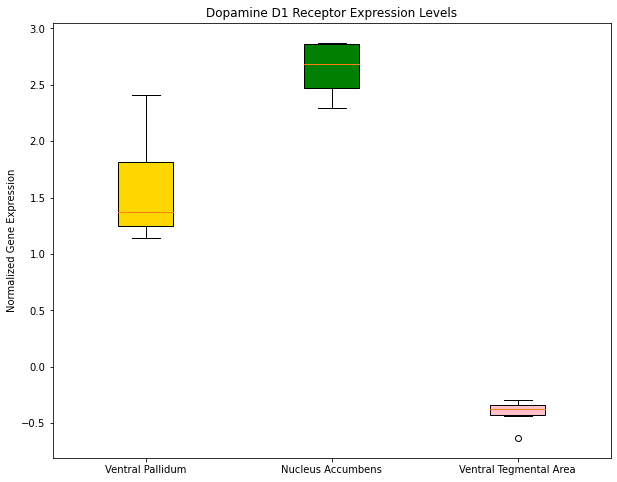

In [26]:
#box plot for VP, VTA, NAC D1R expression 
fig,ax = plt.subplots(1,1,figsize=(10,8))
boxplot_data = [drd1A_vp_means, drd1A_nac_means,drd1A_vta_means]

d1exp_boxplot = ax.boxplot(boxplot_data, patch_artist=True)

#fill
colors = ['gold', 'green', 'pink']
for patch, color in zip(d1exp_boxplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['Ventral Pallidum','Nucleus Accumbens','Ventral Tegmental Area'])
ax.set_ylabel('Normalized Gene Expression')
ax.set_title("Dopamine D1 Receptor Expression Levels")
plt.show()

### 1a. ###
Normalized gene expression for D2 receptors in each area. The VTA shows the lowest level of relative D1 expression.

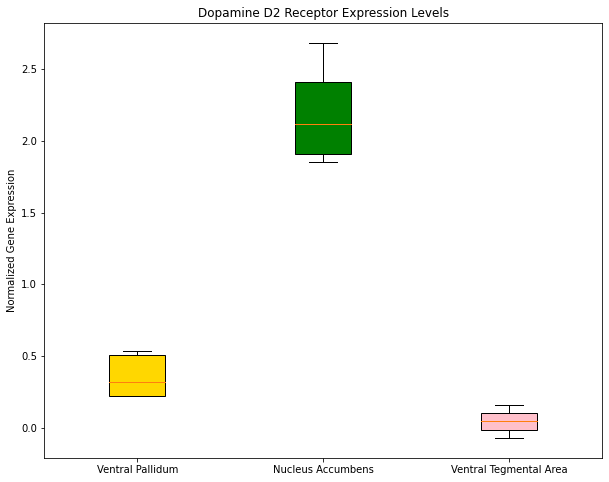

In [27]:
#box plot for VP, VTA, and NAC D2R expression
fig,ax = plt.subplots(1,1,figsize=(10,8))
boxplot_data2 = [drd2_vp_means, drd2_nac_means, drd2_vta_means]

d2exp_boxplot = ax.boxplot(boxplot_data2, patch_artist=True)

for patch, color in zip(d2exp_boxplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['Ventral Pallidum','Nucleus Accumbens','Ventral Tegmental Area'])
ax.set_ylabel('Normalized Gene Expression')
ax.set_title("Dopamine D2 Receptor Expression Levels")
plt.show()

### 1b. ###
Normalized gene expression for D2 receptors in each area. The NAc shows the highest level of relative D2 expression.

Now, let's compare D1 and D2 receptor expression within each brain area.

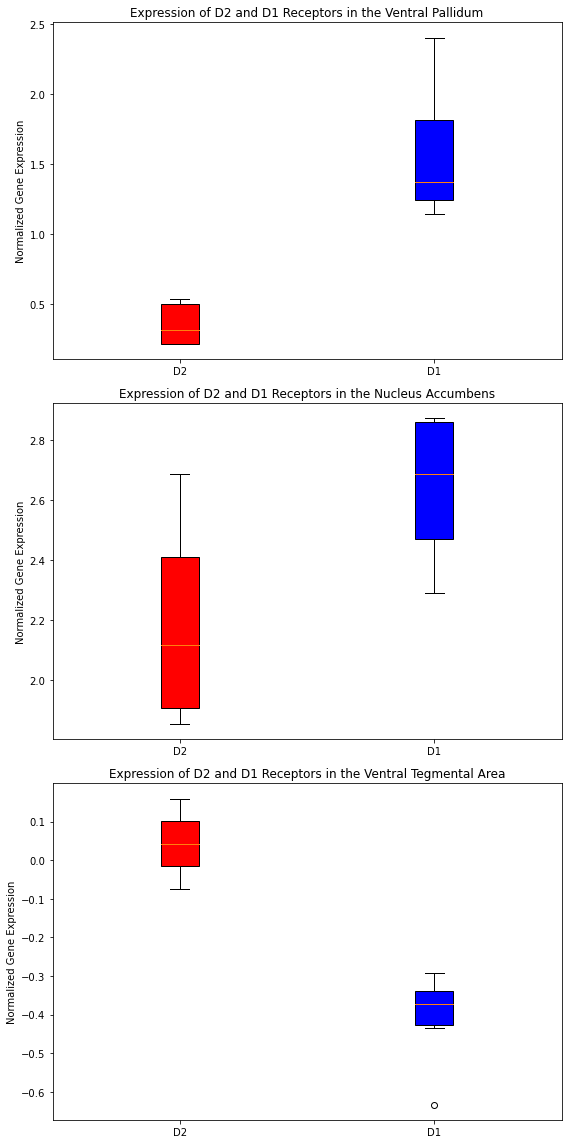

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(8, 16))

dopa_colors = ['red', 'blue']

# Comparing D2 and D1 in the VP
boxplot_data3 = [drd2_vp_means, drd1A_vp_means]
bp = ax[0].boxplot(boxplot_data3, patch_artist=True, boxprops=dict(facecolor="red"))

for patch, color in zip(bp['boxes'], dopa_colors):
    patch.set_facecolor(color)

ax[0].set_xticklabels(['D2', 'D1'])
ax[0].set_ylabel('Normalized Gene Expression')
ax[0].set_title("Expression of D2 and D1 Receptors in the Ventral Pallidum")

# Comparing D2 and D1 in the NAC
boxplot_data4 = [drd2_nac_means, drd1A_nac_means]
bp = ax[1].boxplot(boxplot_data4, patch_artist=True, boxprops=dict(facecolor="red"))

for patch, color in zip(bp['boxes'], dopa_colors):
    patch.set_facecolor(color)

ax[1].set_xticklabels(['D2', 'D1'])
ax[1].set_ylabel('Normalized Gene Expression')
ax[1].set_title("Expression of D2 and D1 Receptors in the Nucleus Accumbens")

# Comparing D2 and D1 in the VTA
boxplot_data5 = [drd2_vta_means, drd1A_vta_means]
bp = ax[2].boxplot(boxplot_data5, patch_artist=True, boxprops=dict(facecolor="red"))

for patch, color in zip(bp['boxes'], dopa_colors):
    patch.set_facecolor(color)

ax[2].set_xticklabels(['D2', 'D1'])
ax[2].set_ylabel('Normalized Gene Expression')
ax[2].set_title("Expression of D2 and D1 Receptors in the Ventral Tegmental Area")

plt.tight_layout()
plt.show()

### 1c. ###
Gene expression rates for D1 vs. D2 receptors in each brain area.

Based on these plots, it seems like we might have some significant trends in differing receptor expression in our regions of interest. Next, we will test for significant differences in expression levels across groups before we combine our data. 

In [29]:
#testing for stastical difference between expression levels in D1 for the nac, vp, and vta
f_stats_d1, p_val_drd1A = stats.f_oneway(drd1A_vp_means, drd1A_nac_means, drd1A_vta_means)
f_stat_d2, p_val_drd2 = stats.f_oneway(drd2_vp_means, drd2_nac_means, drd2_vta_means)

if p_val_drd1A < 0.05:
    print("Reject the null hypothesis - Significant difference between the VP, NAc, and VTA in D1-Receptors")
else:
    print("Fail to reject the null hypothesis - No significant difference between the VP, NAc, and VTA in D1-Receptors")

if p_val_drd2 < 0.05:
    print("Reject the null hypothesis - Significant difference between the VP, NAc, and VTA in D2-Receptors")
else:
    print("Fail to reject the null hypothesis - No significant difference between the VP, NAc, and VTA in D2-Receptors")

#now we will test for difference in expression level between d1 and d2 in each brain area
t_stat, p_val_nac = stats.ttest_ind(drd2_nac_means, drd1A_nac_means)

if p_val_nac < 0.05:
    print("Significant difference found between D1 and D2 in the nucleus accumbens(p < 0.05)")
else:
    print("No significant difference found between D1 and D2 in the nucleus accumbens (p >= 0.05)")


t_stat, p_val_vp = stats.ttest_ind(drd2_vp_means, drd1A_vp_means)
if p_val_vp < 0.05:
    print("Significant difference found between D1 and D2 in the ventral pallidum(p < 0.05)")
else:
    print("No significant difference found between D1 and D2 in the ventral pallidum(p >= 0.05)")


t_stat, p_val_vta = stats.ttest_ind(drd2_vta_means, drd1A_vta_means)
if p_val_vta < 0.05:
    print("Significant difference found between D1 and D2 in the ventral tegmental area(p < 0.05)")
else:
    print("No significant difference found between D1 and D2 in ventral tegmental area(p >= 0.05)")



Reject the null hypothesis - Significant difference between the VP, NAc, and VTA in D1-Receptors
Reject the null hypothesis - Significant difference between the VP, NAc, and VTA in D2-Receptors
Significant difference found between D1 and D2 in the nucleus accumbens(p < 0.05)
Significant difference found between D1 and D2 in the ventral pallidum(p < 0.05)
Significant difference found between D1 and D2 in the ventral tegmental area(p < 0.05)


Let's put this data all together!

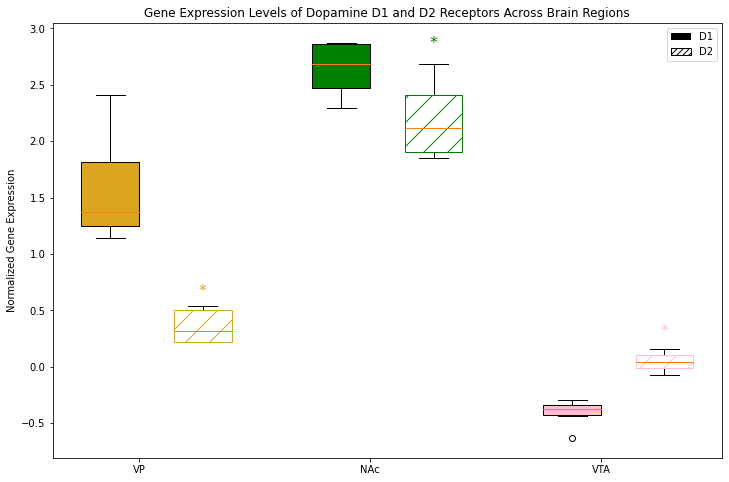

In [30]:
#boxplot of all expression data
fig, ax = plt.subplots(figsize=(12, 8))

#combine the data for D1 and D2 receptors in each brain region
boxplot_data_combined = [
    drd1A_vp_means,  # D1 in VP
    drd2_vp_means,   # D2 in VP
    drd1A_nac_means, # D1 in NAc
    drd2_nac_means,  # D2 in NAc
    drd1A_vta_means, # D1 in VTA
    drd2_vta_means   # D2 in VTA
]

# Colors for each brain region
colors = ['goldenrod', 'goldenrod', 'green', 'green', 'pink', 'pink']

#linestyles
linestyles = ['-', '-', '-', '-', '-', '-']

#make the boxes for d2 hatched
hatches = ['/', '/', '/', '/', '/', '/']

#spacing
positions = [1, 1.8, 3, 3.8, 5, 5.8]

#create plot
boxplot = ax.boxplot(boxplot_data_combined, positions=positions, patch_artist=True)

#color coding boxes and setting texture
for i, (patch, color, linestyle, hatch) in enumerate(zip(boxplot['boxes'], colors, linestyles, hatches)):
    if i % 2 == 0:  # D1 receptors
        patch.set_facecolor(color)
        patch.set_linestyle(linestyle)
    else:  # D2 receptors
        patch.set_facecolor('none')
        patch.set_edgecolor(color)
        patch.set_hatch(hatch)

ax.set_xticks([1.25, 3.25, 5.25])
ax.set_xticklabels(['VP', 'NAc', 'VTA'])
ax.set_ylabel('Normalized Gene Expression')
ax.set_title("Gene Expression Levels of Dopamine D1 and D2 Receptors Across Brain Regions")

# Add significance indicators
for x, p_val, color in zip([1.8], [p_val_vp], ['goldenrod']):
    if p_val < 0.05:
        ax.text(x, 0.6, "*", ha='center', va='bottom', color=color, fontsize=16)
        
for x, p_val, color in zip([3.8], [p_val_nac], ['green']):
    if p_val < 0.05:
        ax.text(x, 2.8, "*", ha='center', va='bottom', color=color, fontsize=16)

for x, p_val, color in zip([5.8], [p_val_vta], ['pink']):
    if p_val < 0.05:
        ax.text(x, 0.25, "*", ha='center', va='bottom', color='pink', fontsize=16)

#legend
legend_labels = ['D1', 'D2']
legend_patches = [plt.Rectangle((0,0),1,1,fc='black'), plt.Rectangle((0,0),1,1,fc='white', edgecolor='black', hatch='////')]
ax.legend(legend_patches, legend_labels, loc='upper right')

plt.show()

## Fig. 1 ##
This plot shows the normalized mean expression levels of D1 and D2 receptors across each of our regions of interest. Significance within an area between the levels of D1 and D2 receptor expression are shown. T-tests were carried out to compare differences in D1/D2 receptors and significant differences were found for each region. The NAc has the overall highest relative expression of both receptor types, while the VTA has the lowest relative expression of both types. The VP shows the largest difference in relative expression between D1 and D2 receptors. 

Now that we have an idea of the trends in receptor expression, let's visualize the trends in D1/D2 receptor-expressing neuronal projections throughout our circuit. 

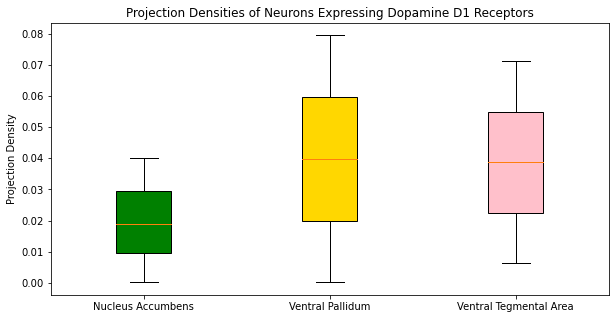

In [31]:
#create boxplot comparing projection densities for D1
fig,ax = plt.subplots(1,1,figsize=(10,5))
#redefine D1 df incase it has been overwritten
Drd1_df = [NAc_Drd1_df, SI_Drd1_df, VTA_Drd1_df]

colors = [ 'green', 'gold','pink']
d1conn_boxplot = ax.boxplot(Drd1_df, patch_artist = True)
for box, color in zip(d1conn_boxplot['boxes'], colors):
    box.set_facecolor(color)

ax.set_xticklabels(['Nucleus Accumbens', 'Ventral Pallidum', 'Ventral Tegmental Area'])
ax.set_ylabel('Projection Density')
ax.set_title("Projection Densities of Neurons Expressing Dopamine D1 Receptors")
plt.show()

# Fig. 2a #

Projection densities of neurons expressing D1 receptors. The relative volume of innervation from neurons that express D1 receptors with cell bodies in the Nucleus accumbens. The NAc recieves the lowest amount of relative D1-expressing neuronal input. Note that significance testing was not carried out due to the few experimental datapoints that were present.

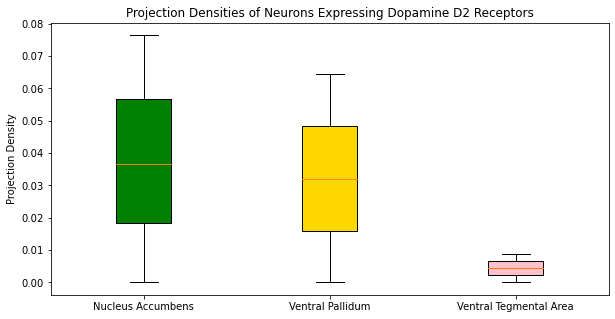

In [32]:
#repeat for D2
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

#redefine D2 df incase it has been overwritten
Drd2_df = [NAc_Drd2_df, SI_Drd2_df, VTA_Drd2_df]

# Creating boxplot
d2conn_boxplot = ax.boxplot(Drd2_df, patch_artist = True)
colors = ['green', 'gold', 'pink']

# Color coding the boxes
for box, color in zip(d2conn_boxplot['boxes'], colors):
    box.set_facecolor(color)

ax.set_xticklabels(['Nucleus Accumbens', 'Ventral Pallidum', 'Ventral Tegmental Area'])
ax.set_ylabel('Projection Density')
ax.set_title("Projection Densities of Neurons Expressing Dopamine D2 Receptors")

plt.show()

# Fig. 2b #

Projection densities of neurons expressing D2 receptors. The relative volume of innervation from neurons that express D2 receptors with cell bodies in the Nucleus accumbens. The VTA recieves the lowest relative D2-expressing neuronal input.  Note that significance testing was not carried out due to the few experimental datapoints that were present.

Now, let's combine the mean expression and projection densities to see whether there are any trends in the two datasets. We can visualize correlation using scatterplots, each showing the mean expression and mean projection density for a given receptor type in each area. We will use the standard deviations for each data type to get a sense of the spread in the data that we have.

First, we will have to combine the datasets in a way that we will be able to access both the gene expression and connectivity data by indexing a region of interest.

In [33]:
#calculate mean and standard deviation for DRD1 and DRD2 expression levels in Nucleus Accumbens
drd1a_NAc_exp = np.mean(drd1A_nac_means)
drd1a_NAc_exp_std = np.std(drd1A_nac_means)
drd2_NAc_exp = np.mean(drd2_nac_means)
drd2_NAc_exp_std = np.std(drd2_nac_means)

#calculate mean and standard deviation for DRD1 and DRD2 expression levels in Ventral Pallidum
drd1a_vp_exp = np.mean(drd1A_vp_means)
drd1a_vp_exp_std = np.std(drd1A_vp_means)
drd2_vp_exp = np.mean(drd2_vp_means)
drd2_vp_exp_std = np.std(drd2_vp_means)

#calculate mean and standard deviation for DRD1 and DRD2 expression levels in Ventral Tegmental Area
drd1a_vta_exp = np.mean(drd1A_vta_means)
drd1a_vta_exp_std = np.std(drd1A_vta_means)
drd2_vta_exp = np.mean(drd2_vta_means)
drd2_vta_exp_std = np.std(drd2_vta_means)

#calculate mean and standard deviation for projection densities for DRD1
NAc_Drd1_mean = NAc_Drd1_df.mean()
NAc_Drd1_std = NAc_Drd1_df.std()
VP_Drd1_mean = SI_Drd1_df.mean()
VP_Drd1_std = SI_Drd1_df.std()
VTA_Drd1_mean = VTA_Drd1_df.mean()
VTA_Drd1_std = VTA_Drd1_df.std()

#calculate mean and standard deviation for projection densities for DRD2
NAc_Drd2_mean = NAc_Drd2_df.mean()
NAc_Drd2_std = NAc_Drd2_df.std()
VP_Drd2_mean = SI_Drd2_df.mean()
VP_Drd2_std = SI_Drd2_df.std()
VTA_Drd2_mean = VTA_Drd2_df.mean()
VTA_Drd2_std = VTA_Drd2_df.std()


combined_data = {
    'Region': ['NAc', 'VP', 'VTA'],
    'DRD1 expression mean': [drd1a_NAc_exp, drd1a_vp_exp, drd1a_vta_exp],
    'DRD1 expression std': [drd1a_NAc_exp_std, drd1a_vp_exp_std, drd1a_vp_exp_std],
    'DRD2 expression mean': [drd2_NAc_exp, drd2_vp_exp, drd1a_vta_exp],
    'DRD2 expression std': [drd2_NAc_exp_std, drd2_vp_exp_std, drd2_vta_exp_std],
    'DRD1 projection density mean': [NAc_Drd1_mean, VP_Drd1_mean, VTA_Drd1_mean],
    'DRD1 projection density std': [NAc_Drd1_std, VP_Drd1_std, VTA_Drd1_std],
    'DRD2 projection density mean': [NAc_Drd2_mean, VP_Drd2_mean, VTA_Drd2_mean],
    'DRD2 projection density std': [NAc_Drd2_std, VP_Drd2_std, VTA_Drd2_std]
}

combined_df = pd.DataFrame(combined_data)

combined_df.head()

,Region,DRD1 expression mean,DRD1 expression std,DRD2 expression mean,DRD2 expression std,DRD1 projection density mean,DRD1 projection density std,DRD2 projection density mean,DRD2 projection density std
0,NAc,2.642543,0.231413,2.186320,0.310186,0.019680,0.019956,0.037706,0.038194
1,VP,1.576310,0.454213,0.357300,0.137188,0.039792,0.039681,0.032169,0.032241
2,VTA,-0.406693,0.454213,-0.406693,0.116620,0.038732,0.032532,0.004552,0.004360


Now that we have a combined dataset that includes the summary statistics that we need, we can make our plot. 

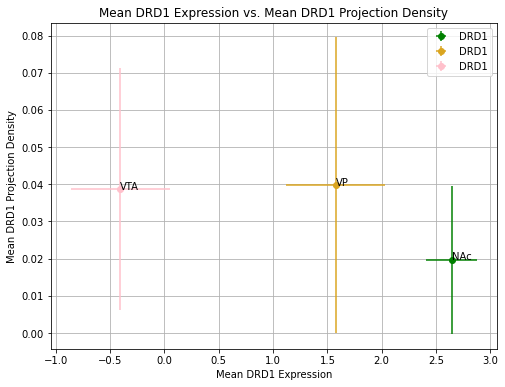

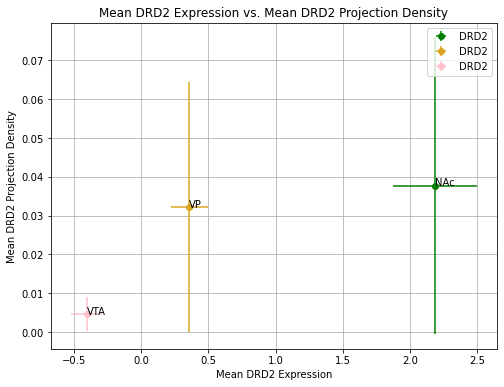

In [34]:
#scatterplots to show correlation

#Plot for DRD1
plt.figure(figsize=(8, 6))
for i, region in enumerate(combined_df['Region']):
    color = 'green' if region == 'NAc' else 'goldenrod' if region == 'VP' else 'pink'
    plt.errorbar(combined_df['DRD1 expression mean'][i], combined_df['DRD1 projection density mean'][i],
                 xerr=combined_df['DRD1 expression std'][i], yerr=combined_df['DRD1 projection density std'][i],
                 fmt='o', label='DRD1', color=color)
    plt.text(combined_df['DRD1 expression mean'][i], combined_df['DRD1 projection density mean'][i], region)
plt.xlabel('Mean DRD1 Expression')
plt.ylabel('Mean DRD1 Projection Density')
plt.title('Mean DRD1 Expression vs. Mean DRD1 Projection Density')
plt.grid(True)
plt.legend()
plt.show()

#Plot for DRD2
plt.figure(figsize=(8, 6))
for i, region in enumerate(combined_df['Region']):
    color = 'green' if region == 'NAc' else 'goldenrod' if region == 'VP' else 'pink'
    plt.errorbar(combined_df['DRD2 expression mean'][i], combined_df['DRD2 projection density mean'][i],
                 xerr=combined_df['DRD2 expression std'][i], yerr=combined_df['DRD2 projection density std'][i],
                 fmt='o', label='DRD2', color=color)
    plt.text(combined_df['DRD2 expression mean'][i], combined_df['DRD2 projection density mean'][i], region)
plt.xlabel('Mean DRD2 Expression')
plt.ylabel('Mean DRD2 Projection Density')
plt.title('Mean DRD2 Expression vs. Mean DRD2 Projection Density')
plt.grid(True)
plt.legend()
plt.show()

## Fig. 3 ##

Mean receptor expression plotted against projection density for each area of interest. Standard deviations shown as error bars to visualize variability in the data. A slight negative trend can be seen for the DRD1 data, while a slight positive trend is seen in the DRD2 data. 

From this, it seems like there might be a positive correlation between projection density and receptor expression for D2 and possibly a negative correlation for D1, but let's do a regression to see whether there is a statistically significant relationship between these variables.

In [35]:
# For DRD1
# Add a constant for the intercept
X_drd1 = sm.add_constant(combined_df['DRD1 expression mean']) 
y_drd1 = combined_df['DRD1 projection density mean']

# Fit the linear regression model
model_drd1 = sm.OLS(y_drd1, X_drd1).fit()  
print(model_drd1.summary())  # Print summary of regression results

# For DRD2
X_drd2 = sm.add_constant(combined_df['DRD2 expression mean'])
y_drd2 = combined_df['DRD2 projection density mean']

model_drd2 = sm.OLS(y_drd2, X_drd2).fit()
print(model_drd2.summary())

#Summary
# For DRD1
if model_drd1.rsquared > 0.8 :
    print("There is a strong correlation between D1 projection density and DRD1 receptor expression.")
elif model_drd1.rsquared > 0.5:
    print("There is a moderate correlation between D1 projection density and DRD1 receptor expression.")
else:
    print("There is no significant correlation between D1 projection density and DRD1 receptor expression.")

# For DRD2
if model_drd2.rsquared > 0.8 :
    print("There is a strong correlation between D2 projection density and DRD2 receptor expression.")
elif model_drd2.rsquared > 0.5:
    print("There is a moderate correlation between D2 projection density and DRD2 receptor expression.")
else:
    print("There is no significant correlation between D2 projection density and DRD2 receptor expression.")

                                 OLS Regression Results                                 
Dep. Variable:     DRD1 projection density mean   R-squared:                       0.543
Model:                                      OLS   Adj. R-squared:                  0.086
Method:                           Least Squares   F-statistic:                     1.188
Date:                          Sun, 12 May 2024   Prob (F-statistic):              0.473
Time:                                  00:13:13   Log-Likelihood:                 10.970
No. Observations:                             3   AIC:                            -17.94
Df Residuals:                                 1   BIC:                            -19.74
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/conda/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Based on the regression test, it seems like there is at least a moderate relationship between receptor expression and projection density. However, it is important to understand that because we have very few Cre experiments there is fairly low statistical power in this test, and we only have three brain regions from which to create our regression model. Thus, more observations would be needed to make a definitive statement regarding the relationship between these two variables.

## Conclusion & Discussion

The receptors expressed by a brain area are expected to correspond to the inputs it receives. D1 and D2 inputs to various parts of the mesolimbic pathway have been well characterized. Thus, we utilized data for D1 and D2 receptors to understand and correlate the circuitry of three brain regions in the mesolimbic pathway with their receptor expression. Canonically, the circuitry of the mesolimbic pathway has been described as a direct D1 pathway from the NAc to the VTA alongside an indirect pathway from the NAc utilizing D2-MSNs as input neurons first to the VP and then D2 input from the VP to the VTA. An updated concept indicates that a more likely model uses D1 and D2 neurons as inputs both to the VTA and the VP (Kupchik and Kalivas, 2017). 

We predicted that the VP would express more D2 receptors as it ‘expects’ input from D2 neurons with cell bodies in the NAc. However, the VP was found to express more D1 receptors than D2 receptors, which is somewhat supported by the updated findings that D1 neurons, which comprise a significant portion of what was previously known as the D2 pathway, synapse on the VP before the VTA (Kupchik et al, 2015). Since the NAc contains the cell bodies of both D1 and D2 neurons and is reciprocally and recurrently connected to itself and other areas via dopaminergic input, it follows that we found the highest relative expression of both D1 and D2 receptors in this area (Xia et al, 2011). Finally, the VTA receives input from the VP as well as the NAc through both neuron types, both in the canonical model as well as the updated blended model. Because of this, we expected to see both receptor types expressed in the area, and while D1 and D2 expression was found, both were very low. This may be due to the VTA’s small relative size limiting it to a smaller pool of input neurons or few experimental data points in the microarray data.

Projection density was the metric chosen to analyze the connectivity dataset, which is a measure of the sum of the pixels in which the reporter is detected divided by the total pixels in that region. Because the NAc projects downstream to the VTA and VP, as well as back to itself and participates in reciprocal dopaminergic circuits via the VTA, we chose it as our injection structure to measure the downstream connectivity of the circuit (Van Bockstaele and Pickel, 1995). We found that while the normalized projection densities of the D1-receptor expressing neurons were fairly consistent, the VTA was innervated by almost no neurons from the NAC that expressed D2 receptors. This is consistent with the canonical indirect/direct pathway concept, as the VTA receives D1 input from the NAc, while D2 neurons targeting the VTA primarily originate in the VP after receiving D2 input from the NAc via the indirect D2 pathway (Van Bockstaele and Pickel, 1995, Pardo-Garcia et al, 2019). The updated blended concept supports our finding as well, as it suggests that D2 input to the VTA is still only from the VP, which sends and receives both types of dopaminergic input. However, the finding that the VP is innervated by both D1-MSNs and D2-MSNs with somas in the NAc suggests that the updated concept may be more accurate as both neuron types are represented in the NAc/VP circuit as opposed to D2 only. 

There is consistency across the two datasets in that the VP and NAc express D1 and D2 receptors and are innervated by both neuron types, however the VTA is preferentially innervated by D1 neurons from the NAc yet expresses a higher level of D2 receptors. This could be explained by the fact that the VTA is innervated by D2 neurons coming from the VP, rather than the NAc. Because we only used experiments with the NAc as the injection structure we only saw projections coming from the NAc, thus the D2 innervation of the area may not have been fully represented. While there was a moderate positive correlation among the D2 data, there was a moderate negative correlation in the D1 data. However, the combined data showed significant variability, most likely due to very few data points being present (only 2 experiments for DRD2 and 3 for DRD1). Limiting our analysis only to three brain areas also meant that regression could not be as statistically sound as if we measured trends in many areas across the whole brain. For future analyses, a higher number of projection experiments would be beneficial as physiological data can be difficult to interpret with precision especially with very few subjects. Additionally, while the gene expression data provides information regarding total receptor density, the projection density data depends on the injection site and thus does not provide information regarding the total number of neurons of a certain type innervating that structure. To get a sense of an area’s true projection density for a certain neuron type, all inputs of that neuron type should be considered, and it would be expected that the receptor density would more closely match the amount of input from that cell type. 

The instances of consistency seen between receptor and projection density indicates that it could be useful to analyze the gene expression of an area for receptors to a certain neurotransmitter prior to gathering any anatomical data, which often requires histology and can be difficult to repeat and carry out on a large scale. The type and amount of receptors that an area expresses, which can be accessed from databases such as the Allen Institute’s microarray data, may give valuable insight into the projections that it expects and can help researchers to understand targets and inputs within less well-understood circuits.

## References ##

Andrade, L., Caraveo-Anduaga, J. J., Berglund, P., Bijl, R. V., De Graaf, R., Vollebergh, W., Dragomirecka, E., Kohn, R., Keller, M., Kessler, R. C., Kawakami, N., Kiliç, C., Offord, D., Ustun, T. B., & Wittchen, H. U. (2003). The epidemiology of major depressive episodes: results from the International Consortium of Psychiatric Epidemiology (ICPE) Surveys. International journal of methods in psychiatric research, 12(1), 3–21. https://doi.org/10.1002/mpr.138

Allen Institute for Brain Science. (2004). Allen Mouse Brain Atlas Connectivity. Available from mouse.brain-map.org.

Allen Institute for Brain Science. (2004). Allen Mouse Brain Atlas MicroArray. Available from mouse.brain-map.org.

Doncheck, E. M., & Mantsch, J. R. (2019). Role of Stress-Associated Signaling in Addiction. https://doi.org/10.1016/B978-0-12-812202-0.00011-7

Knowland, D., & Lim, B. K. (2018). Circuit-based frameworks of depressive behaviors: The role of reward circuitry and beyond. Pharmacology, biochemistry, and behavior, 174, 42–52. https://doi.org/10.1016/j.pbb.2017.12.010

Kravitz, A. V., Tye, L. D., & Kreitzer, A. C. (2012). Distinct roles for direct and indirect pathway striatal neurons in reinforcement. Nature neuroscience, 15(6), 816–818. https://doi.org/10.1038/nn.3100

Kupchik, Y., Brown, R., Heinsbroek, J., et al. (2015). Coding the direct/indirect pathways by D1 and D2 receptors is not valid for accumbens projections. Nat Neurosci, 18, 1230–1232. https://doi.org/10.1038/nn.4068

Kupchik, Y., Kalivas, P. (2017). The Direct and Indirect Pathways of the Nucleus Accumbens are not What You Think. Neuropsychopharmacology, 42, 369–370. https://doi.org/10.1038/npp.2016.160

Nestler, E. J., & Hyman, S. E. (2010). Animal models of neuropsychiatric disorders. Nature neuroscience, 13(10), 1161–1169. https://doi.org/10.1038/nn.2647

Pardo-Garcia, T. R., Garcia-Keller, C., Penaloza, T., Richie, C. T., Pickel, J., Hope, B. T., Harvey, B. K., Kalivas, P. W., & Heinsbroek, J. A. (2019). Ventral Pallidum Is the Primary Target for Accumbens D1 Projections Driving Cocaine Seeking. The Journal of neuroscience : the official journal of the Society for Neuroscience, 39(11), 2041–2051. https://doi.org/10.1523/JNEUROSCI.2822-18.2018

Van Bockstaele, E. J., & Pickel, V. M. (1995). GABA-containing neurons in the ventral tegmental area project to the nucleus accumbens in rat brain. Brain research, 682(1-2), 215–221. https://doi.org/10.1016/0006-8993(95)00334-m

Xia, Y., Driscoll, J. R., Wilbrecht, L., Margolis, E. B., Fields, H. L., & Hjelmstad, G. O. (2011). Nucleus accumbens medium spiny neurons target non-dopaminergic neurons in the ventral tegmental area. The Journal of neuroscience : the official journal of the Society for Neuroscience, 31(21), 7811–7816. https://doi.org/10.1523/JNEUROSCI.1504-11.2011

Zhou, K., Xu, H., Lu, S., et al. (2022). Reward and aversion processing by input-defined parallel nucleus accumbens circuits in mice. Nat Commun, 13, 6244. https://doi.org/10.1038/s41467-022-33843-3